# Generating Synthetic Data
In data analysis, it is important that we have the ability to test our assumptions. One powerful tool to enable these tests is simulation. In 3ML, we have several ways to generate synthetic data sets both from models and from fits.

## Synthetic data from spectra

### Genertating data from models

Most of the current plugins support the ability to generate synthetic data directly from a model. This can be very useful to assertain the detectability of a source/component/line or simply to see how models look once they are transformed into data. Below we will demonstrate how different plugins transform a model into synthetic data.

#### XYLike

In many of the examples, the basic XYLike plugin has been used to generate synthetic data. Here, we will revisit the plugin for completeness.


In [1]:
import warnings

warnings.simplefilter("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.seterr(all="ignore")
from threeML import *
from threeML.io.package_data import get_path_of_data_file

[WARNING ] The naima package is not available. Models that depend on it will not be available


[WARNING ] The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.


[WARNING ] The ebltable package is not available. Models that depend on it will not be available


In [3]:
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
set_threeML_style()
silence_warnings()

[INFO    ] Using Gaussian statistic (equivalent to chi^2) with the provided errors.


[INFO    ] Using Gaussian statistic (equivalent to chi^2) with the provided errors.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


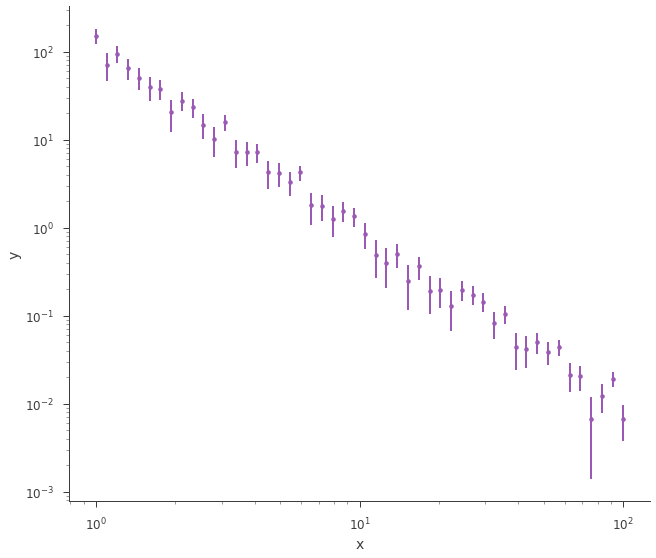

In [4]:
# Select an astromodels function to from which to simualte
generating_function = Powerlaw(K=1.0, index=-2, piv=10.0)

# set up the x grig points
x_points = np.logspace(0, 2, 50)

# call the from_function classmethod
xyl_generator = XYLike.from_function(
    "sim_data",
    function=generating_function,
    x=x_points,
    yerr=0.3 * generating_function(x_points),
)


fig = xyl_generator.plot(x_scale="log", y_scale="log")

#### SpectrumLike

Generating synthetic spectra from SpectrumLike (non-energy dispersed count spectra) can take many forms with different inputs.

First, let's set the energy bins we will use for all generated spectra

In [5]:

energies = np.logspace(0, 2, 51)

# create the low and high energy bin edges
low_edge = energies[:-1]
high_edge = energies[1:]

Now, let's use a blackbody for the source spectrum.

In [6]:
# get a BPL source function
source_function = Blackbody(K=1, kT=5.0)

##### Poisson spectrum with no background

[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: None


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: None


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


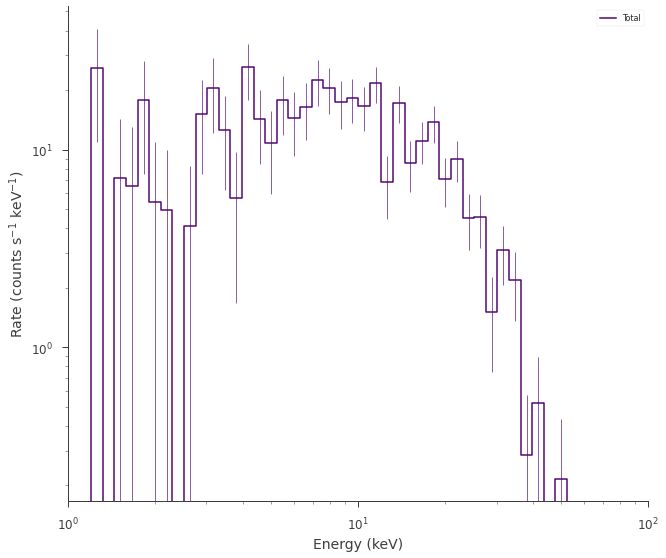

In [7]:
spectrum_generator = SpectrumLike.from_function(
    "fake", source_function=source_function, energy_min=low_edge, energy_max=high_edge
)


fig = spectrum_generator.view_count_spectrum()

##### Gaussian spectrum with no background

[INFO    ] Auto-probed noise models:


[INFO    ] - observation: gaussian


[INFO    ] - background: None


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: gaussian


[INFO    ] - background: None


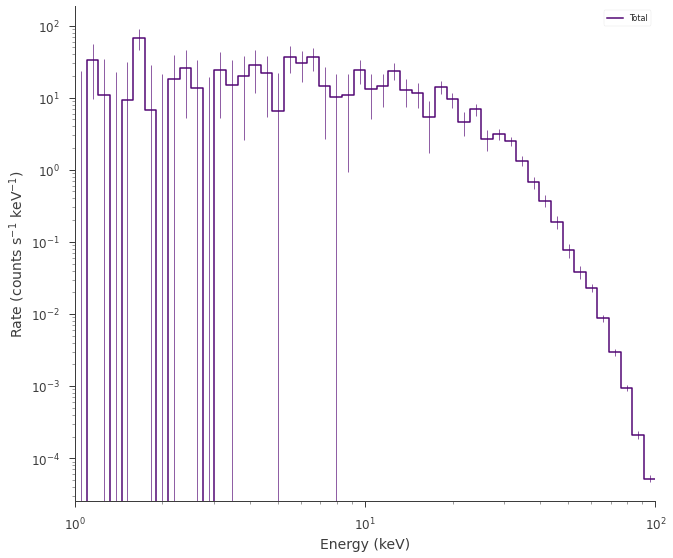

In [8]:
spectrum_generator = SpectrumLike.from_function(
    "fake",
    source_function=source_function,
    source_errors=0.5 * source_function(low_edge),
    energy_min=low_edge,
    energy_max=high_edge,
)


fig = spectrum_generator.view_count_spectrum()

##### Poisson spectrum with Poisson Background

[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: None


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: None


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: poisson


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: poisson


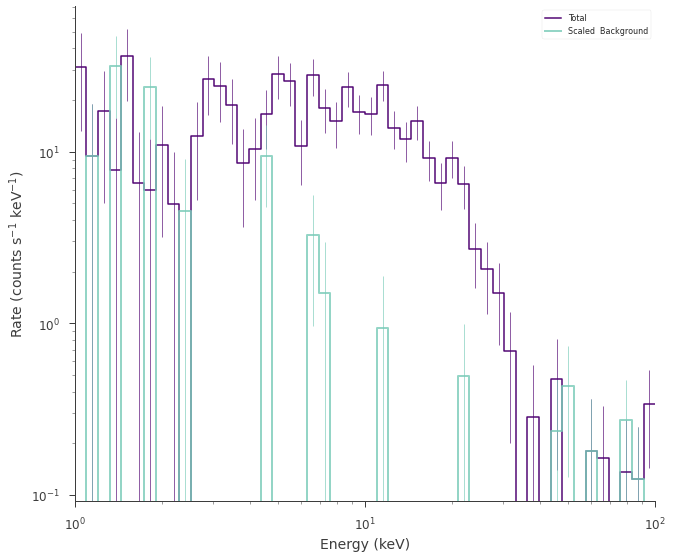

In [9]:

# power law background function
background_function = Powerlaw(K=0.7, index=-1.5, piv=10.0)

spectrum_generator = SpectrumLike.from_function(
    "fake",
    source_function=source_function,
    background_function=background_function,
    energy_min=low_edge,
    energy_max=high_edge,
)


fig = spectrum_generator.view_count_spectrum()

##### Poisson spectrum with Gaussian background

[INFO    ] Auto-probed noise models:


[INFO    ] - observation: gaussian


[INFO    ] - background: None


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: gaussian


[INFO    ] - background: None


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: gaussian


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: gaussian


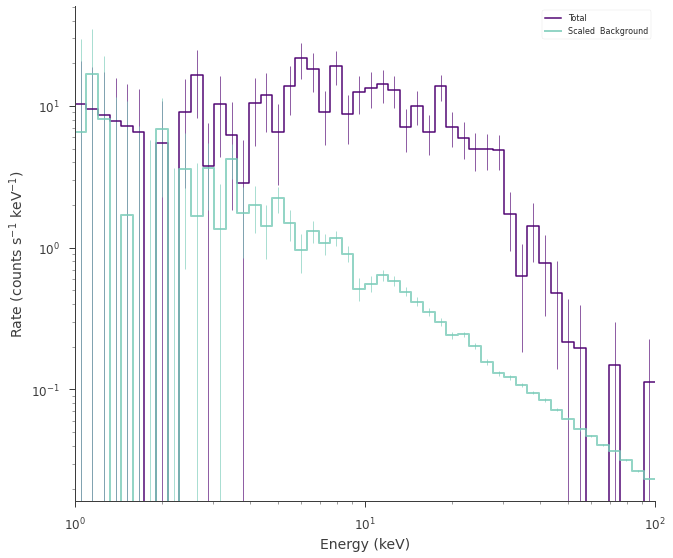

In [10]:

spectrum_generator = SpectrumLike.from_function(
    "fake",
    source_function=source_function,
    background_function=background_function,
    background_errors=0.1 * background_function(low_edge),
    energy_min=low_edge,
    energy_max=high_edge,
)


fig = spectrum_generator.view_count_spectrum()

#### DispersionSpectrumLike

DispersionSpectrumLike behaves in the same fashion as SpectrumLike except that a 3ML Instrument response must be set which means that the energy bins do not need to be specified as they are derived from the response

Let's grab a response from an instrument.

In [11]:
from threeML.io.package_data import get_path_of_data_file
from threeML.utils.OGIP.response import OGIPResponse

# we will use a demo response
response = OGIPResponse(get_path_of_data_file("datasets/ogip_powerlaw.rsp"))

In [12]:
# rescale the functions for the response
source_function = Blackbody(K=1e-7, kT=500.0)
background_function = Powerlaw(K=1, index=-1.5, piv=1.0e3)
spectrum_generator = DispersionSpectrumLike.from_function(
    "fake",
    source_function=source_function,
    background_function=background_function,
    response=response,
)

[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: None


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: None


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: poisson


[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: poisson


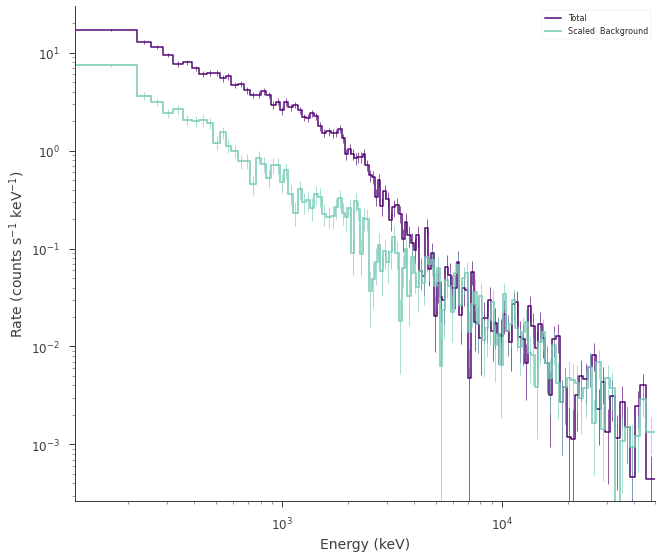

In [13]:
fig = spectrum_generator.view_count_spectrum()

### Generating spectra from fitted models

When performing goodness of fit tests, likelihood ratio tests (both automatic in 3ML) or posterior predictive checks, we need to generate synthetic data from our fitted models. Therefore, we proved methods to do this for most current plugins.

#### XYLike

Let's load some example, generic XY data and fit it with a power law.

[INFO    ] Using Gaussian statistic (equivalent to chi^2) with the provided errors.


[INFO    ] set the minimizer to minuit


[INFO    ] set the minimizer to MINUIT


Best fit values:



,result,unit
parameter,,
source.spectrum.main.Powerlaw.K,(8.8 +/- 0.8) x 10^-1,1 / (cm2 keV s)
source.spectrum.main.Powerlaw.index,-1.974 +/- 0.033,



Correlation matrix:



1.00,-0.87
-0.87,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,22.762756
xyl,22.762756



Values of statistical measures:



,statistical measures
AIC,49.780832
BIC,53.349559


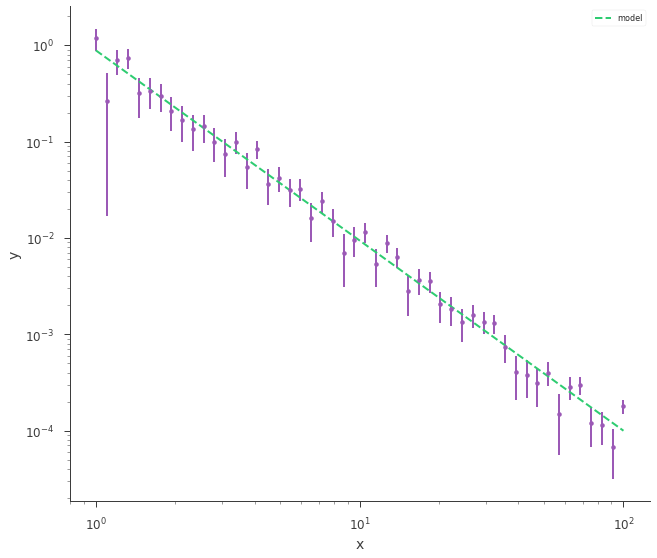

In [14]:
data_path = get_path_of_data_file("datasets/xy_powerlaw.txt")


xyl = XYLike.from_text_file("xyl", data_path)

fit_function = Powerlaw()

xyl.fit(fit_function)

fig = xyl.plot(x_scale="log", y_scale="log")

Once our fit has been finished, we can produce simulated data sets from those model parameters.

[INFO    ] Using Gaussian statistic (equivalent to chi^2) with the provided errors.


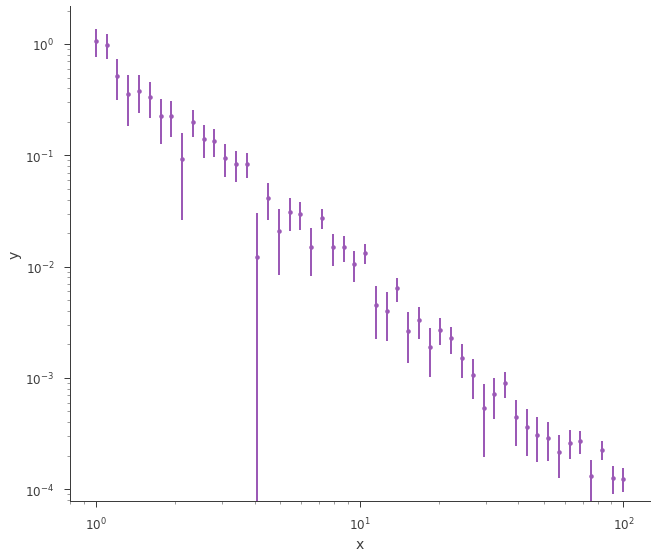

In [15]:
synthetic_xyl = xyl.get_simulated_dataset()

fig = synthetic_xyl.plot(x_scale="log", y_scale="log")

#### SpectrumLike and DispersionSpectrumLike (OGIPLike)

Both spectrum plugins work in the same way when generating data from a fit. They both keep track of the statistical properties of the likelihoods in the plugin so that the simulated datasets have the appropriate statistical properties. Additionally, background, responsses, etc. are simulated and/or kept track of as well.

Let's fit an example energy dispersed spectrum.

[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: poisson


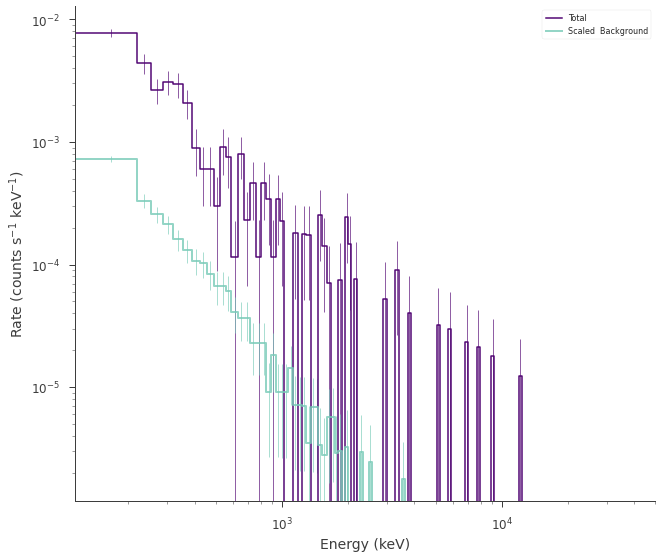

In [16]:
ogip_data = OGIPLike(
    "ogip",
    observation=get_path_of_data_file("datasets/ogip_powerlaw.pha"),
    background=get_path_of_data_file("datasets/ogip_powerlaw.bak"),
    response=get_path_of_data_file("datasets/ogip_powerlaw.rsp"),
)

ogip_data.view_count_spectrum()
# define the function
fit_function = Cutoff_powerlaw(K=1e-3, xc=1000, index=-0.66)

# define the point source
point_source = PointSource("ps", 0, 0, spectral_shape=fit_function)

# define the model
model = Model(point_source)

ogip_data.set_model(model)

Now we can now generate synthetic datasets from the fitted model. This will include the background sampled properly from the profile likelihood. The instrument response is automatically passed to the new plugin.

[INFO    ] Auto-probed noise models:


[INFO    ] - observation: poisson


[INFO    ] - background: poisson


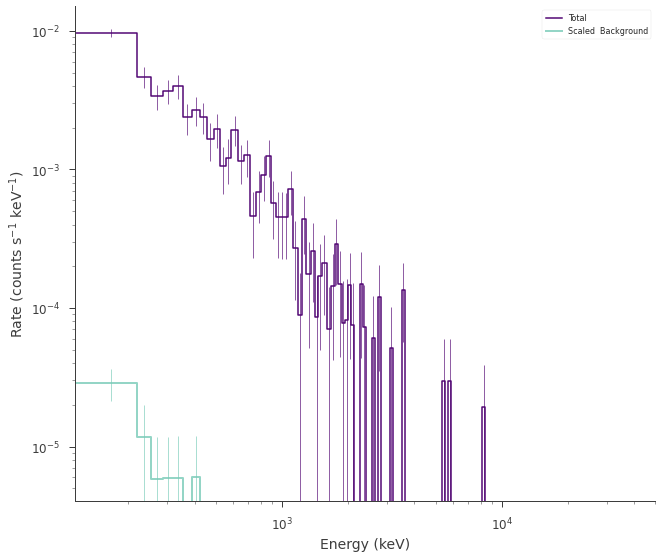

In [17]:
synthetic_ogip = ogip_data.get_simulated_dataset()

fig = synthetic_ogip.view_count_spectrum()